In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
avl_data = pd.read_csv('../RND.csv')
avl_data.head()

d:\projects\SAO fleet modeling\fleet_modeling_repo\.venv\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,355200040542414,20130718072730,20130718124906,98,0,285,98.1
0,355200040542414,20130721052048,20130721124940,105.0,4999,418,104
1,355200040542414,20130722051631,20130722115322,218.0,10550,514,106
2,355200040542414,20130723060459,20130723122704,105.0,5181,747,104
3,355200040542414,20130724055705,20130724132215,184.0,8613,412,106
4,355200040542414,20130725050633,20130725140301,140.0,6031,102,120


In [3]:
avl_data.columns = ['IMEI', 'start_time', 'stop_time', 'distance_travelled', 'moving_time', 'idle_time', 'speed']
avl_data.head()

,IMEI,start_time,stop_time,distance_travelled,moving_time,idle_time,speed
0,355200040542414,20130721052048,20130721124940,105.0,4999,418,104
1,355200040542414,20130722051631,20130722115322,218.0,10550,514,106
2,355200040542414,20130723060459,20130723122704,105.0,5181,747,104
3,355200040542414,20130724055705,20130724132215,184.0,8613,412,106
4,355200040542414,20130725050633,20130725140301,140.0,6031,102,120


In [4]:
len(avl_data.IMEI.unique())

24875

In [5]:
# Compare real travel time with estimated travel time
remove_0_speed_data = avl_data[avl_data['speed'] > 0]
time_diff = remove_0_speed_data['distance_travelled'] / remove_0_speed_data['speed'] * 3600 -\
      (remove_0_speed_data['moving_time'] + remove_0_speed_data['idle_time'])
time_diff.describe()

count    1.877827e+07
mean    -4.240977e+03
std      7.840785e+04
min     -8.639900e+04
25%     -5.198769e+03
50%     -2.779279e+03
75%     -1.382645e+03
max      1.179647e+08
dtype: float64

In [6]:
avl_data['time_diff'] = time_diff
avl_data.head()

,IMEI,start_time,stop_time,distance_travelled,moving_time,idle_time,speed,time_diff
0,355200040542414,20130721052048,20130721124940,105.0,4999,418,104,-1782.384615
1,355200040542414,20130722051631,20130722115322,218.0,10550,514,106,-3660.226415
2,355200040542414,20130723060459,20130723122704,105.0,5181,747,104,-2293.384615
3,355200040542414,20130724055705,20130724132215,184.0,8613,412,106,-2775.943396
4,355200040542414,20130725050633,20130725140301,140.0,6031,102,120,-1933.000000


Text(0.5, 1.0, 'Time difference between recorded travel time and estimated travel time')

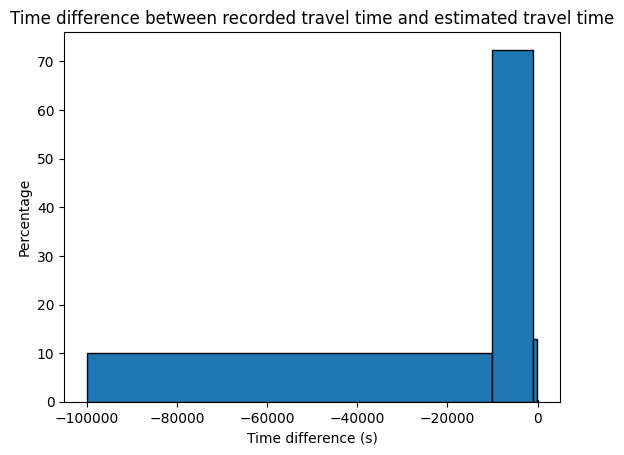

In [7]:
bins = [-1e+05, -1e+04, -1000, -100, -10, -1, 0]
plt.hist(time_diff, bins=bins, weights=np.ones(len(time_diff)) / len(time_diff) * 100, edgecolor='black')
plt.xlabel('Time difference (s)')
plt.ylabel('Percentage')
plt.title('Time difference between recorded travel time and estimated travel time')

Text(0.5, 1.0, 'Speed distribution')

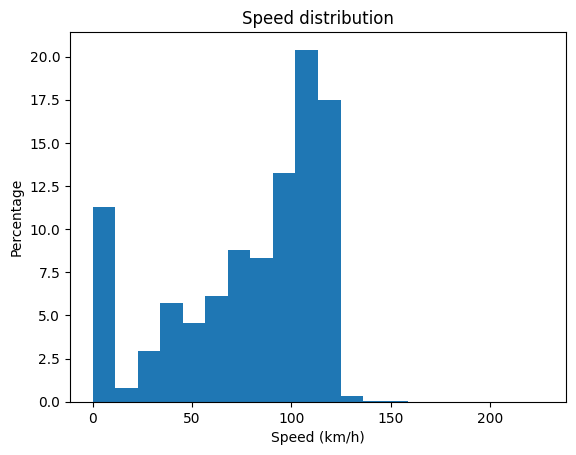

In [8]:
plt.hist(avl_data['speed'], bins=20, weights=np.ones(len(avl_data)) / len(avl_data) * 100)
plt.xlabel('Speed (km/h)')
plt.ylabel('Percentage')    
plt.title('Speed distribution')

Text(0.5, 1.0, 'Distance travelled distribution')

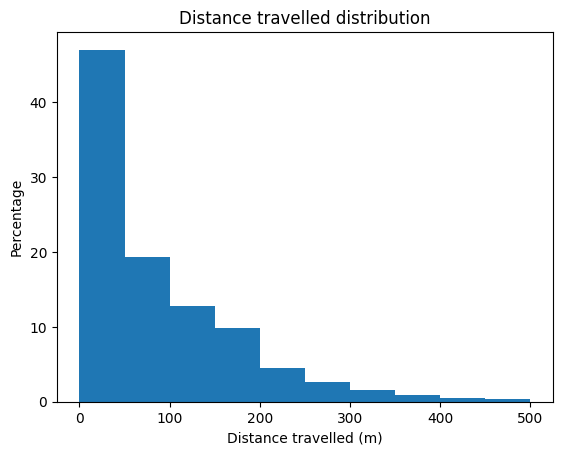

In [70]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
plt.hist(avl_data['distance_travelled'], bins=bins, weights=np.ones(len(avl_data)) / len(avl_data) * 100)
plt.xlabel('Distance travelled (m)')
plt.ylabel('Percentage')
plt.title('Distance travelled distribution')

Text(0.5, 1.0, 'Travel time distribution')

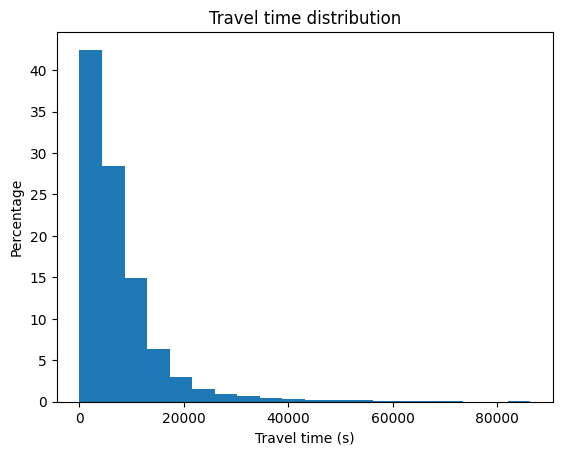

In [9]:
travel_time = avl_data['moving_time'] + avl_data['idle_time']
plt.hist(travel_time, bins=20, weights=np.ones(len(travel_time)) / len(travel_time) * 100)
plt.xlabel('Travel time (s)')
plt.ylabel('Percentage')
plt.title('Travel time distribution')

In [10]:
avl_data[avl_data['distance_travelled']==0].head()

,IMEI,start_time,stop_time,distance_travelled,moving_time,idle_time,speed,time_diff
113,355200040542414,20140315173714,20140315173900,0.0,0,106,0,NaN
316,355200040542414,20140825061348,20140825062338,0.0,0,0,0,NaN
330,355200040542414,20140923120929,20140923122334,0.0,0,86,0,NaN
337,355200040542414,20141023055141,20141023171412,0.0,0,29,0,NaN
338,355200040542414,20141026054139,20141026183920,0.0,13079,1441,116,-14520.0


In [11]:
# Remove nonsense data points
avl_data_1 = avl_data[~((avl_data['distance_travelled'] == 0) & ((avl_data['speed'] != 0) | (avl_data['moving_time'] != 0)))]
avl_data_2 = avl_data_1[~((avl_data_1['speed'] == 0) & ((avl_data_1['distance_travelled'] != 0) | (avl_data_1['moving_time'] != 0)))]
avl_data_3 = avl_data_2[~((avl_data_2['moving_time'] == 0) & ((avl_data_2['speed'] != 0) | (avl_data_2['distance_travelled'] != 0)))]
avl_data_3.shape

(19745492, 8)

In [12]:
time_diff = avl_data_3['distance_travelled'] / avl_data_3['speed'] * 3600 -\
      (avl_data_3['moving_time'] + avl_data_3['idle_time'])
time_diff.describe()

count    1.824996e+07
mean    -4.490880e+03
std      7.926536e+04
min     -8.638871e+04
25%     -5.283573e+03
50%     -2.856613e+03
75%     -1.476471e+03
max      1.179647e+08
dtype: float64

In [85]:
time_diff.quantile(.99)

1061.2950738915995

Text(0.5, 1.0, 'Time difference between recorded travel time and estimated travel time')

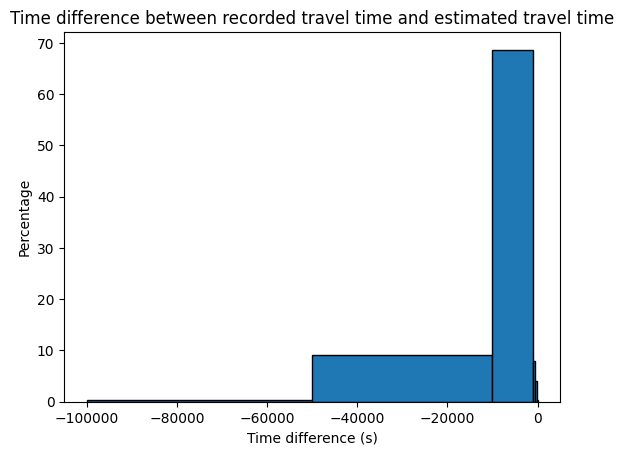

In [115]:
bins = [-100000, -50000, -10000, -1000, -500, -100, -10, -1, 0]
plt.hist(time_diff, bins=bins, weights=np.ones(len(time_diff)) / len(time_diff) * 100, edgecolor='black')
plt.xlabel('Time difference (s)')
plt.ylabel('Percentage')
plt.title('Time difference between recorded travel time and estimated travel time')

Text(0.5, 1.0, 'Travel time distribution')

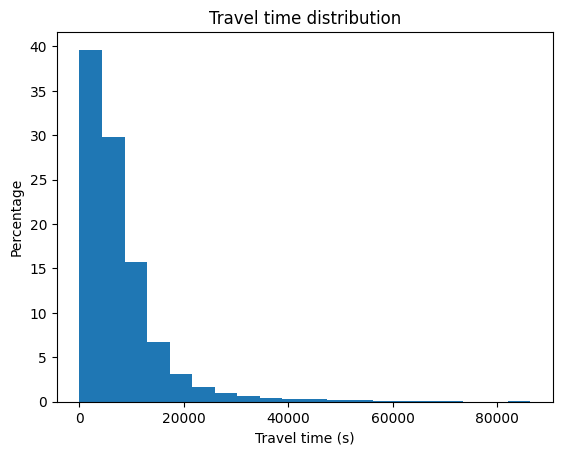

In [93]:
travel_time = avl_data_3['moving_time'] + avl_data_3['idle_time']
plt.hist(travel_time, bins=20, weights=np.ones(len(travel_time)) / len(travel_time) * 100)
plt.xlabel('Travel time (s)')
plt.ylabel('Percentage')
plt.title('Travel time distribution')

Text(0.5, 1.0, 'Distance travelled distribution')

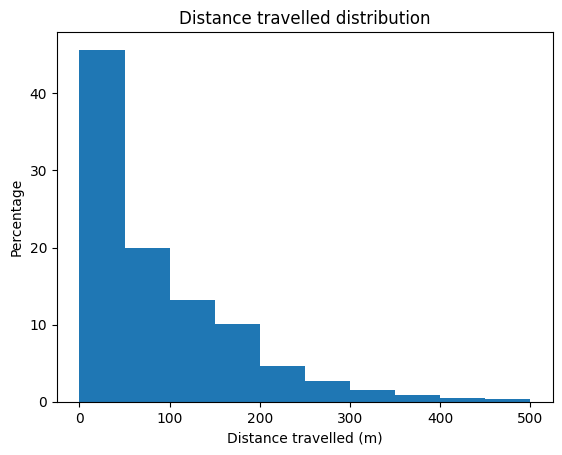

In [13]:
distance = avl_data_3['distance_travelled']
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
plt.hist(distance, bins=bins, weights=np.ones(len(distance)) / len(distance) * 100)
plt.xlabel('Distance travelled (m)')
plt.ylabel('Percentage')
plt.title('Distance travelled distribution')

Text(0.5, 1.0, 'Speed distribution')

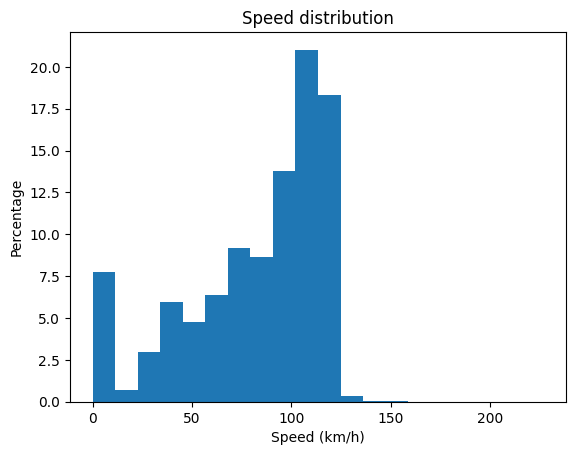

In [96]:
speed = avl_data_3['speed']
plt.hist(speed, bins=20, weights=np.ones(len(speed)) / len(speed) * 100)
plt.xlabel('Speed (km/h)')
plt.ylabel('Percentage')
plt.title('Speed distribution')

In [ ]:
# Only 130 data points have time_diff = 0
avl_data_3.loc[avl_data_3['time_diff'] == 0].shape

(130, 8)

In [118]:
avl_data_3.loc[(avl_data_3['time_diff'] > -10000) &(avl_data_3['time_diff'] < -1000)].shape

(13557743, 8)

In [121]:
avl_data_3[avl_data_3['speed']>80].shape[0]/avl_data_3.shape[0]

0.6145538941242892

In [14]:
avl_data_3['estimated_speed_with_idle'] = avl_data_3['distance_travelled'] / (avl_data_3['moving_time'] + avl_data_3['idle_time']) * 3600
avl_data_3['estimated_speed_without_idle'] = avl_data_3['distance_travelled'] / avl_data_3['moving_time'] * 3600
avl_data_4 = avl_data_3[avl_data_3['estimated_speed_with_idle'] < avl_data_3['estimated_speed_with_idle'].quantile(.99)]
avl_data_4 = avl_data_4[avl_data_4['estimated_speed_without_idle'] < avl_data_4['estimated_speed_without_idle'].quantile(.99)]
speed = avl_data_4['speed']
estimated_speed_with_idle = avl_data_4['estimated_speed_with_idle']
estimated_speed_without_idle = avl_data_4['estimated_speed_without_idle']

d:\projects\SAO fleet modeling\fleet_modeling_repo\.venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\projects\SAO fleet modeling\fleet_modeling_repo\.venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


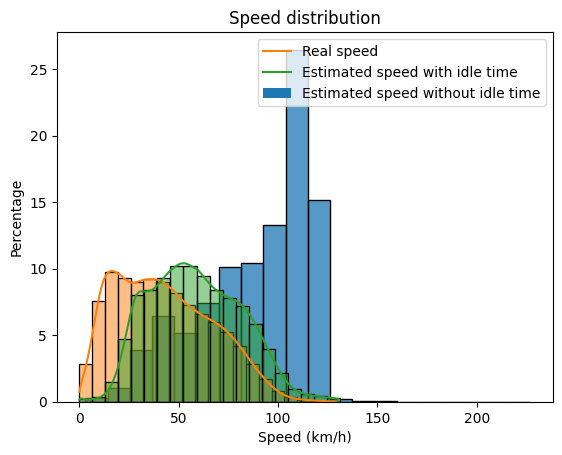

In [24]:
# plot histogram


bins = 20
# plt.hist(speed, bins=bins, weights=np.ones(len(speed)) / len(speed) * 100, color='skyblue', edgecolor='black')
sns.histplot(speed, stat='percent', bins = bins)
sns.histplot(estimated_speed_with_idle, stat='percent', bins = bins,  kde = True)
sns.histplot(estimated_speed_without_idle, stat='percent', bins = bins, kde = True)

# plt.hist(estimated_speed_with_idle, bins=bins, weights=np.ones(len(estimated_speed_with_idle)) / len(estimated_speed_with_idle) * 100, alpha=0.5, color='green', edgecolor='black')
# plt.hist(estimated_speed_without_idle, bins=bins, weights=np.ones(len(estimated_speed_without_idle)) / len(estimated_speed_without_idle) * 100, alpha=0.5, color='purple', edgecolor='black')
plt.xlabel('Speed (km/h)')
plt.ylabel('Percentage')
plt.title('Speed distribution')
plt.legend(['Real speed', 'Estimated speed with idle time', 'Estimated speed without idle time'])

Text(0.5, 1.0, 'Real speed vs estimated speed')

d:\Aimsun\Aimsun_scripting\Model\.venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\Aimsun\Aimsun_scripting\Model\.venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


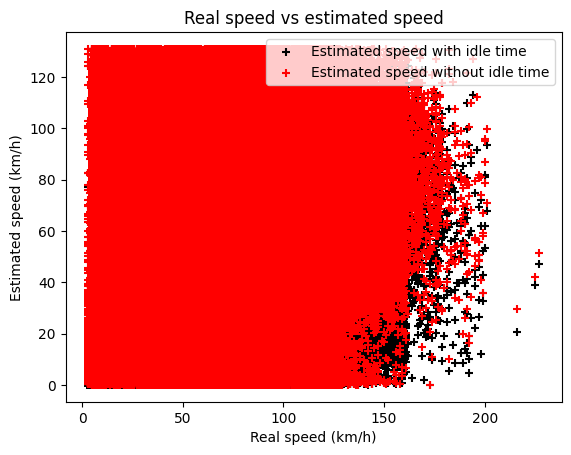

In [73]:
# plot scatter
plt.scatter(speed, estimated_speed_with_idle, color='black', marker='+')
plt.scatter(speed, estimated_speed_without_idle, color='red', marker='+')
plt.xlabel('Real speed (km/h)')
plt.ylabel('Estimated speed (km/h)')
plt.legend(['Estimated speed with idle time', 'Estimated speed without idle time'])
plt.title('Real speed vs estimated speed')